Falco Valentina, Flores Lorena

# Proyecto Final: Rendimiento de establecimientos de Salud 2005-2022

## Explicación del csv:

INGRESO: aceptación formal de un paciente por el establecimiento asistencial para su atención médica. El ingreso implica la ocupación de una cama y el mantenimiento de una historia clínica para el paciente. 

EGRESO: salida del establecimiento de un paciente internado, puede darse por alta médica, traslado a otro establecimiento, defunción, retiro voluntario del paciente, u otro. 

PACIENTE DIA: permanencia de un paciente internado, ocupando una cama en un establecimiento de salud, durante el período comprendido entre las 0 y las 24 horas de un mismo día. Un paciente-día refleja los servicios recibidos por un paciente internado dentro de un día censal. 

CAMAS DE DOTACION: número de camas asignadas al establecimiento por la autoridad competente, destinadas a la internación de pacientes, que funcionan regularmente en períodos de actividad normal. En los hospitales oficiales, la dotación de camas será propuesta por el director del establecimiento para su aprobación por el organismo del cual dependa (nacional, provincial, municipal). 

CAMAS DISPONIBLES: camas instaladas en el establecimiento en condiciones de uso para la atención de los pacientes internados, independientemente de que estén o no ocupadas. El número de camas disponibles puede variar diariamente debido a:  
1) se agreguen camas por demanda estacional, emergencias, etc.;  
2) se retiren camas para reparación, desinfección, clausura temporaria del servicio, etc.

No siempre la totalidad de las camas de dotación están disponibles –es decir en condiciones de uso para la atención de los pacientes- durante el período de análisis. Las camas disponibles son las camas en funcionamiento cada día del período de análisis. 

DÍAS - CAMAS DISPONIBLES: camas disponibles por cantidad de días del período indicado. 

PROMEDIO DE CAMAS DISPONIBLES: total días – camas disponibles del período / total de días del período indicado. 

PORCENTAJE DE OCUPACIÓN: total de pacientes día * 100 / días – camas disponibles. 

DIAS DE ESTADIA: total de días que el paciente permaneció internado en el establecimiento, desde la fecha de ingreso hasta la fecha de egreso. 

PROMEDIO DÍAS DE ESTADA: días de estadía del período / total de egresos del período. 

CONSULTAS MÉDICA: atención brindada por un profesional en un consultorio externo: 
1) SERVICIOS MEDICOS DE CONSULTORIO EXTERNO: son servicios donde la atención es brindada por profesionales médicos de las diferentes especialidades. Ej. Cirugía, Clínica Médica, etc. 
2) SERVICIOS PARAMEDICOS DE CONSULTORIO EXTERNO: son servicios donde la atención es brindada por profesionales no médicos. Ej. Psicólogos, Fonoaudiólogo, etc. 

INTERCONSULTAS: consultas brindadas por profesionales médicos o no médicos a pacientes internados, mediando siempre la solicitud del médico tratante, para su realización. 

TASA MORTALIDAD HOSPITALARIA: número de defunciones en el período ocurridas en el establecimiento * 100 / número de egresos. 

GIRO DE CAMAS: total de egresos del período / promedio camas disponibles.

## Objetivo

- Explorar y describir la distribución de ingresos, egresos y consultas médicas para conocer el volumen y características de la atención brindada.

- Calcular indicadores hospitalarios relevantes, como el porcentaje de ocupación de camas, el promedio de días de estadía, el giro de camas y la tasa de mortalidad hospitalaria, que permiten evaluar la eficiencia y calidad del servicio prestado.

- Detectar posibles desequilibrios entre la cantidad de camas disponibles y la demanda de internación, considerando factores como la estacionalidad anual o la capacidad instalada.

- Visualizar y modelar tendencias en la evolución de la internación y la ocupación de camas a lo largo del tiempo, lo cual podría contribuir a la planificación y optimización de recursos.

- Comparar el comportamiento entre distintos servicios médicos y paramédicos, para evaluar la carga asistencial de cada uno y proponer mejoras si fuese necesario.

## Exploración y transformación de datos con Pandas

### Importación de librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn

### Uso de una función de numpy para que se muestren todos los resultados y no datos cortados

In [26]:
np.set_printoptions(threshold=np.inf)

### Seteamos la ruta del archivo

In [3]:
ruta = 'https://raw.githubusercontent.com/valentinafalco/ProyectoFinal-DS-YPF/main/2da%20PreEntrega/rendimientos-hospitalarios_2005-2022.csv'

### Leemos el archivo en un data frame

En una primer instancia, nos encontramos con que al leer el csv aparecía un error. Revisando, vimos que el separador del archivo es ";", por lo cual tuvimos que agregarlo y de esta forma funcionó.

In [4]:
archivo = pd.read_csv(ruta, sep = ';')

### Revisamos el archivo

In [5]:
print(archivo)

       anio region_sanitaria  municipio_id municipio_nombre  \
0      2005                I         60007    Adolfo Alsina   
1      2005                I         60007    Adolfo Alsina   
2      2005                I         60007    Adolfo Alsina   
3      2005                I         60007    Adolfo Alsina   
4      2005                I         60007    Adolfo Alsina   
...     ...              ...           ...              ...   
38988  2022                V          6882           Zárate   
38989  2022                V          6882           Zárate   
38990  2022                V          6882           Zárate   
38991  2022                V          6882           Zárate   
38992  2022                V          6882           Zárate   

       establecimiento_id                     establecimiento_nombre  \
0                     NaN  Hospital Local General José de San Martín   
1                     NaN                    Hospital Dr. Noe Yarcho   
2                     NaN  

#### Verificamos la estructura del archivo

In [6]:
type(archivo)

pandas.core.frame.DataFrame

#### Revisamos la cantidad de columnas y de filas que tiene

In [7]:
array = archivo.shape
print(array)
print("Cantidad de filas: ", array[0])
print("Cantidad de columnas: ", array[1])

(38993, 21)
Cantidad de filas:  38993
Cantidad de columnas:  21


#### Revisamos el nombre de las columnas

In [8]:
nombreColumnas = archivo.columns
print("Nombre de las columnas: \n", nombreColumnas)

Nombre de las columnas: 
 Index(['anio', 'region_sanitaria', 'municipio_id', 'municipio_nombre',
       'establecimiento_id', 'establecimiento_nombre', 'dependencia',
       'consultas_odontologicas', 'consultas_medicas', 'consultas_paramedicas',
       'interconsultas', 'egresos', 'dias_camas_disponible',
       'promedio_camas_disponibles', 'pacientes_dias', 'porcentaje_ocupacion',
       'dias_estadia', 'promedio_dias_estadia', 'defunciones', 'giro_de_camas',
       'tasa_mortalidad_hospitalaria'],
      dtype='object')


#### Inspeccionamos las primeras 20 filas

In [9]:
archivo.head(20)

,anio,region_sanitaria,municipio_id,municipio_nombre,establecimiento_id,establecimiento_nombre,dependencia,consultas_odontologicas,consultas_medicas,consultas_paramedicas,...,egresos,dias_camas_disponible,promedio_camas_disponibles,pacientes_dias,porcentaje_ocupacion,dias_estadia,promedio_dias_estadia,defunciones,giro_de_camas,tasa_mortalidad_hospitalaria
0,2005,I,60007,Adolfo Alsina,NaN,Hospital Local General José de San Martín,Municipal,6424.0,94401.0,18888.0,...,1474.0,10963.0,30.0,4798.0,44.0,4529.0,3.0,42.0,49.0,3.0
1,2005,I,60007,Adolfo Alsina,NaN,Hospital Dr. Noe Yarcho,Municipal,4493.0,18370.0,4459.0,...,471.0,10950.0,30.0,2184.0,20.0,2027.0,4.0,20.0,16.0,4.0
2,2005,I,60007,Adolfo Alsina,NaN,Hogar de Ancianos General N. Levalle,Municipal,0.0,0.0,0.0,...,2.0,12740.0,35.0,11371.0,89.0,848.0,424.0,1.0,0.0,50.0
3,2005,I,60007,Adolfo Alsina,NaN,Hospital Demetrio Carmelo Loyarte,Municipal,0.0,2024.0,846.0,...,120.0,6570.0,18.0,278.0,4.0,279.0,2.0,1.0,7.0,1.0
4,2005,I,60007,Adolfo Alsina,NaN,Unidad Sanitaria San Miguel Arcangel,Municipal,3086.0,2196.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2005,I,60007,Adolfo Alsina,NaN,Unidad Sanitaria Colonia Lapin,Municipal,0.0,601.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2005,I,60007,Adolfo Alsina,NaN,Unidad Sanitaria Dr. J.C. Senepart,Municipal,0.0,608.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2005,I,60007,Adolfo Alsina,NaN,Unidad Sanitaria Murature,Municipal,0.0,510.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2005,I,60007,Adolfo Alsina,NaN,Unidad Sanitaria Barrio Arturo Illia,Municipal,0.0,3337.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2005,I,60007,Adolfo Alsina,NaN,Unidad Sanitaria Villa Goldberg,Municipal,0.0,3726.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Inspeccionamos las últimas 20 filas

In [10]:
archivo.tail(20)

,anio,region_sanitaria,municipio_id,municipio_nombre,establecimiento_id,establecimiento_nombre,dependencia,consultas_odontologicas,consultas_medicas,consultas_paramedicas,...,egresos,dias_camas_disponible,promedio_camas_disponibles,pacientes_dias,porcentaje_ocupacion,dias_estadia,promedio_dias_estadia,defunciones,giro_de_camas,tasa_mortalidad_hospitalaria
38973,2022,V,6882,Zárate,88200571.0,Sala de Pros. Aux. 25 de Mayo,Municipal,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38974,2022,V,6882,Zárate,88200172.0,Sala de Pros. Aux. Va. Carmencita,Municipal,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38975,2022,V,6882,Zárate,88200300.0,Sala de Pros. Aux. Bo. San Jacinto,Municipal,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38976,2022,V,6882,Zárate,88200407.0,Sala de Pros. Aux. Almirante Brown,Municipal,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38977,2022,V,6882,Zárate,88200679.0,Sala de Pros. Aux. Villa Messoni,Municipal,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38978,2022,V,6882,Zárate,88200164.0,Ctro. de Rehabilitación del Lisiado,Municipal,NaN,NaN,1212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38979,2022,V,6882,Zárate,88200415.0,Sala de Pros. Aux. Burgar,Municipal,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38980,2022,V,6882,Zárate,88200482.0,Sala de Pros. Aux. Dr. A. Arreghi,Municipal,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38981,2022,V,6882,Zárate,88200661.0,Sala de Pros. Aux. San Miguel,Municipal,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38982,2022,V,6882,Zárate,88200105.0,Sala de Pros. Aux. Villa Fox,Municipal,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Revisamos valores unicos para la columna "region_sanitaria"

In [11]:
valores = archivo["region_sanitaria"].unique()
print("Valores encontrados: ", valores)

Valores encontrados:  ['I' 'II' 'III' 'IV' 'IX' 'V' 'VI' 'VII' 'VIII' 'X' 'XI' 'XII']


#### Revisamos valores unicos para la columna "municipio_nombre" y su cantidad

In [12]:
municipios = archivo["municipio_nombre"].unique()
cantidadMunicipios = len(municipios)
print("Municipios encontrados en el archivo: \n", municipios)
print("\n")
print("Cantidad de municipios: ", cantidadMunicipios)

Municipios encontrados en el archivo: 
 ['Adolfo Alsina' 'Adolfo Gonzales Chaves' 'Bahía Blanca'
 'Coronel de Marina Leonardo Rosales' 'Coronel Dorrego' 'Coronel Pringles'
 'Coronel Suárez' 'Guaminí' 'Monte Hermoso' 'Patagones' 'Puán' 'Saavedra'
 'Tornquist' 'Tres Arroyos' 'Villarino' 'Carlos Casares' 'Carlos Tejedor'
 'Daireaux' 'General Villegas' 'Hipólito Yrigoyen' '9 de Julio' 'Pehuajó'
 'Pellegrini' 'Rivadavia' 'Salliqueló' 'Trenque Lauquen' 'Tres Lomas'
 'Chacabuco' 'Florentino Ameghino' 'General Arenales' 'General Pinto'
 'General Viamonte' 'Junín' 'Leandro N. Alem' 'Lincoln' 'Arrecifes'
 'Baradero' 'Capitán Sarmiento' 'Carmen de Areco' 'Colón' 'Pergamino'
 'Ramallo' 'Rojas' 'Salto' 'San Andrés de Giles' 'San Antonio de Areco'
 'San Nicolás' 'San Pedro' 'Azul' 'Benito Juárez' 'Bolívar'
 'General Alvear' 'General La Madrid' 'Laprida' 'Las Flores' 'Olavarría'
 'Rauch' 'Tapalqué' 'Campana' 'Escobar' 'Exaltación De La Cruz'
 'General San Martín' 'José C. Paz' 'Malvinas Argentinas' '

#### Revisamos valores unicos para la columna "establecimiento_nombre" y su cantidad

In [13]:
establecimientos = archivo["establecimiento_nombre"].unique()
cantidadEstablecimientos = len(establecimientos)
print("Diferentes establecimientos: \n", establecimientos)
print("Cantidad de establecimientos: ", cantidadEstablecimientos)

Diferentes establecimientos: 
 ['Hospital Local General José de San Martín' 'Hospital Dr. Noe Yarcho'
 'Hogar de Ancianos General N. Levalle' ...
 'Hospital Municipal "Dr. Francisco Eguiguren"'
 'Geriátrico Municipal Juan Couste'
 'Hospital  municipal Dr. René Favaloro']
Cantidad de establecimientos:  5225


#### Revisamos valores unicos para la columna "dependencia" y su cantidad

In [14]:
dependencias = archivo["dependencia"].unique()
cantidadDependencias = len(dependencias)
print("Diferentes dependencias: \n", dependencias)
print("Cantidad de dependencias: ", cantidadDependencias)

Diferentes dependencias: 
 ['Municipal' 'Provincial' 'Nacional']
Cantidad de dependencias:  3


#### Revisamos los tipos de dato para cada columna

In [15]:
archivo.dtypes

anio                              int64
region_sanitaria                 object
municipio_id                      int64
municipio_nombre                 object
establecimiento_id              float64
establecimiento_nombre           object
dependencia                      object
consultas_odontologicas         float64
consultas_medicas               float64
consultas_paramedicas           float64
interconsultas                  float64
egresos                         float64
dias_camas_disponible           float64
promedio_camas_disponibles      float64
pacientes_dias                  float64
porcentaje_ocupacion            float64
dias_estadia                    float64
promedio_dias_estadia           float64
defunciones                     float64
giro_de_camas                   float64
tasa_mortalidad_hospitalaria    float64
dtype: object

#### Revisamos cantidad de valores faltantes en cada columna

In [16]:
faltantes = archivo.isnull().sum()
print("Valores faltantes: \n", faltantes)

Valores faltantes: 
 anio                                0
region_sanitaria                    0
municipio_id                        0
municipio_nombre                    0
establecimiento_id              27522
establecimiento_nombre              0
dependencia                         0
consultas_odontologicas          5590
consultas_medicas                1039
consultas_paramedicas            3031
interconsultas                  10997
egresos                          9546
dias_camas_disponible            9535
promedio_camas_disponibles       9535
pacientes_dias                   9474
porcentaje_ocupacion             9540
dias_estadia                     9568
promedio_dias_estadia            9663
defunciones                      9591
giro_de_camas                    9567
tasa_mortalidad_hospitalaria     9663
dtype: int64


### Limpieza y modificación del archivo

#### Cambiamos los NaN por 0

Modificamos los NaN de "consultas_odontologicas", "consultas_medicas", "consultas_paramedicas", "interconsultas", "egresos", "dias_camas_disponible", "promedio_camas_disponibles", "pacientes_dias", "porcentaje_ocupacion", "dias_estadia", "promedio_dias_estadia", "defunciones", "giro_de_camas", "tasa_mortalidad_hospitalaria" a 0

In [26]:
columnasReemplazo = ["consultas_odontologicas", "consultas_medicas", "consultas_paramedicas", "interconsultas", "egresos", "dias_camas_disponible", "promedio_camas_disponibles", "pacientes_dias", "porcentaje_ocupacion", "dias_estadia", "promedio_dias_estadia", "defunciones", "giro_de_camas", "tasa_mortalidad_hospitalaria"] 
archivo[columnasReemplazo] = archivo[columnasReemplazo].fillna(0)

#### Verificamos que se hayan realizado los cambios

In [18]:
print(archivo)


       anio region_sanitaria  municipio_id municipio_nombre  \
0      2005                I         60007    Adolfo Alsina   
1      2005                I         60007    Adolfo Alsina   
2      2005                I         60007    Adolfo Alsina   
3      2005                I         60007    Adolfo Alsina   
4      2005                I         60007    Adolfo Alsina   
...     ...              ...           ...              ...   
38988  2022                V          6882           Zárate   
38989  2022                V          6882           Zárate   
38990  2022                V          6882           Zárate   
38991  2022                V          6882           Zárate   
38992  2022                V          6882           Zárate   

       establecimiento_id                     establecimiento_nombre  \
0                     NaN  Hospital Local General José de San Martín   
1                     NaN                    Hospital Dr. Noe Yarcho   
2                     NaN  

In [19]:
faltantesNuevo = archivo.isnull().sum()
print("Valores faltantes: \n", faltantesNuevo)

Valores faltantes: 
 anio                                0
region_sanitaria                    0
municipio_id                        0
municipio_nombre                    0
establecimiento_id              27522
establecimiento_nombre              0
dependencia                         0
consultas_odontologicas             0
consultas_medicas                   0
consultas_paramedicas               0
interconsultas                      0
egresos                             0
dias_camas_disponible               0
promedio_camas_disponibles          0
pacientes_dias                      0
porcentaje_ocupacion                0
dias_estadia                        0
promedio_dias_estadia               0
defunciones                         0
giro_de_camas                       0
tasa_mortalidad_hospitalaria        0
dtype: int64


#### Cambiar a "sin id" a los establecimientos que no lo tienen

In [23]:
columna = ["establecimiento_id"]
archivo[columna] = archivo[columna].fillna("Sin ID")

In [24]:
faltantesNuevo2 = archivo.isnull().sum()
print("Valores faltantes: \n", faltantesNuevo2)

Valores faltantes: 
 anio                            0
region_sanitaria                0
municipio_id                    0
municipio_nombre                0
establecimiento_id              0
establecimiento_nombre          0
dependencia                     0
consultas_odontologicas         0
consultas_medicas               0
consultas_paramedicas           0
interconsultas                  0
egresos                         0
dias_camas_disponible           0
promedio_camas_disponibles      0
pacientes_dias                  0
porcentaje_ocupacion            0
dias_estadia                    0
promedio_dias_estadia           0
defunciones                     0
giro_de_camas                   0
tasa_mortalidad_hospitalaria    0
dtype: int64


In [25]:
print(archivo)

       anio region_sanitaria  municipio_id municipio_nombre  \
0      2005                I         60007    Adolfo Alsina   
1      2005                I         60007    Adolfo Alsina   
2      2005                I         60007    Adolfo Alsina   
3      2005                I         60007    Adolfo Alsina   
4      2005                I         60007    Adolfo Alsina   
...     ...              ...           ...              ...   
38988  2022                V          6882           Zárate   
38989  2022                V          6882           Zárate   
38990  2022                V          6882           Zárate   
38991  2022                V          6882           Zárate   
38992  2022                V          6882           Zárate   

      establecimiento_id                     establecimiento_nombre  \
0                 Sin ID  Hospital Local General José de San Martín   
1                 Sin ID                    Hospital Dr. Noe Yarcho   
2                 Sin ID      

### Cálculos de medias, desviaciones y promedios con Pandas

##### Sección 1: análisis entre los años 2019 y 2020

El año 2020 estuvo marcado por la irrupción de la pandemia de COVID-19, lo que provocó una disrupción profunda en los servicios de salud. Los hospitales y centros sanitarios debieron reorganizarse rápidamente para priorizar la atención de pacientes con COVID, suspendiendo cirugías programadas, consultas médicas no urgentes y reduciendo el flujo habitual de internaciones.

###### Variación en las consultas médicas:

Para analizar la variación en las consultas médicas durante el año 2020, se comparará la cantidad promedio de consultas realizadas en ese año respecto al 2019. El objetivo es observar si hubo una disminución significativa en la atención ambulatoria durante el contexto de pandemia, donde se suspendieron o postergaron consultas no urgentes. Esta comparación permitirá dimensionar el impacto en la demanda de servicios médicos básicos.

In [10]:
promedioConsultasMedicas2020 = round(archivo[archivo["anio"]==2020][["consultas_medicas", "consultas_paramedicas"]].mean(), 2)
promedioConsultasMedicas = round(archivo["consultas_medicas"].mean(), 2)
promedioConsultasMedicas2019 = round(archivo[archivo["anio"]==2019][["consultas_medicas", "consultas_paramedicas"]].mean(), 2)
variacion = round(((promedioConsultasMedicas2020 - promedioConsultasMedicas2019) / promedioConsultasMedicas2019) * 100, 2)

print("Promedio de consultas médicas en general: ", promedioConsultasMedicas)
print("\n")
print("Promedio de consultas médicas y paramedicas en 2020 (COVID-19)")
print("Promedio de consultas médicas: ", promedioConsultasMedicas2020["consultas_medicas"])
print("Promedio de consultas paramedicas: ", promedioConsultasMedicas2020["consultas_paramedicas"])
print("\n")
print("Promedio de consultas médicas y paramedicas en 2019 (año previo al COVID-19)")
print("Promedio de consultas médicas: ", promedioConsultasMedicas2019["consultas_medicas"])
print("Promedio de consultas paramedicas: ", promedioConsultasMedicas2019["consultas_paramedicas"])
print("\n")
print("Variación porcentual en consultas médicas: %", variacion["consultas_medicas"])
print("Variación porcentual en consultas paramedicas: %", variacion["consultas_paramedicas"])

Promedio de consultas médicas en general:  27913.12


Promedio de consultas médicas y paramedicas en 2020 (COVID-19)
Promedio de consultas médicas:  30465.4
Promedio de consultas paramedicas:  4076.33


Promedio de consultas médicas y paramedicas en 2019 (año previo al COVID-19)
Promedio de consultas médicas:  36567.73
Promedio de consultas paramedicas:  6255.35


Variación porcentual en consultas médicas: % -16.69
Variación porcentual en consultas paramedicas: % -34.83


Durante el 2020, las consultas médicas disminuyeron un 16,69% y las paramédicas un 34,83% respecto a 2019. Esto refleja una fuerte caída en la atención ambulatoria durante la pandemia, posiblemente por el temor al contagio y la suspensión de actividades no urgentes.

###### Variación en los egresos hospitalarios

En cuanto a los egresos hospitalarios, voy a calcular el promedio anual de egresos durante el período 2017–2019 y compararlo con el valor observado en 2020. A partir de eso, voy a estimar la caída porcentual. Esta métrica permitirá identificar la magnitud del descenso en las internaciones y poner en evidencia cómo la pandemia afectó el flujo habitual de pacientes hospitalizados, tanto por decisiones organizativas como por cambios en la demanda.

In [11]:
promedioEgresos2020 = round(archivo[archivo["anio"]==2020]["egresos"].mean(), 2)
promedioEgresos2019 = round(archivo[archivo["anio"]==2019]["egresos"].mean(), 2)
variacionEgresos = round(((promedioEgresos2020-promedioEgresos2019)/promedioEgresos2019) * 100, 2)
promedioEgresos = round(archivo["egresos"].mean(), 2)

print("Promedio de egresos en general: ", promedioEgresos)
print("\n")
print("Promedio de egresos 2020: ", promedioEgresos2020)
print("Promedio de egresos 2019: ", promedioEgresos2019)
print("Variación porcentual: %", variacionEgresos)

Promedio de egresos en general:  606.01


Promedio de egresos 2020:  2796.89
Promedio de egresos 2019:  3166.19
Variación porcentual: % -11.66


En 2020, los egresos hospitalarios cayeron un 11,66% respecto a 2019. Esto puede deberse a la suspensión de internaciones programadas, pero también a que muchos pacientes no egresaban sino que fallecían, lo cual se analizará en el siguiente punto.

###### Variación en la tasa de mortalidad

Por último, se comparará la tasa de mortalidad hospitalaria del año 2020 con la de los años previos. Esta comparación permitirá observar si la pandemia tuvo efectos sobre la gravedad de los casos internados, ya que durante los momentos más críticos del sistema sanitario se priorizó la internación de pacientes más graves, lo que podría haber elevado la mortalidad hospitalaria.

In [16]:
tasa2019 = round(archivo[archivo["anio"]==2019]["tasa_mortalidad_hospitalaria"].mean(), 2)
tasa2020 = round(archivo[archivo["anio"]==2020]["tasa_mortalidad_hospitalaria"].mean(), 2)
variacionTasa = round(((tasa2020-tasa2019)/tasa2019)*100, 2)
mediaTasa = round(archivo["tasa_mortalidad_hospitalaria"].mean(), 2)

print("Promedio de tasa de mortalidad en 2019: ", tasa2019)
print("Promedio de tasa de mortalidad en 2020: ", tasa2020)
print("Variación en la tasa de mortalidad: %", variacionTasa)
print("Media general de la tasa de mortalidad: ", mediaTasa)

Promedio de tasa de mortalidad en 2019:  10.62
Promedio de tasa de mortalidad en 2020:  11.33
Variación en la tasa de mortalidad: % 6.69
Media general de la tasa de mortalidad:  2.22


En 2020, la tasa de mortalidad hospitalaria aumentó un 6,69% respecto a 2019, pasando de 10,62 a 11,33. Este incremento sugiere un posible impacto clínico de la pandemia. Además, ambas tasas están muy por encima de la media general (2,22), lo que indica que la mortalidad fue especialmente alta en esos años críticos.

###### Variación en la ocupación de camas

Respecto al porcentaje de ocupación de camas, el análisis consiste en comparar el promedio de este indicador en 2020 con los valores de años anteriores. Esto ayudará a evaluar si hubo una disminución en la ocupación hospitalaria, posiblemente producto de la suspensión de internaciones programadas o de una reorganización de recursos para priorizar casos críticos. Además, si es necesario, se puede analizar la varianza para ver si hubo más inestabilidad en el uso de camas durante ese año.


In [21]:
promedioOcupacion2020= round(archivo.loc[archivo["anio"]==2020]["porcentaje_ocupacion"].mean(),2)
promedioOcupacion2019 = round(archivo.loc[archivo["anio"]==2019]["porcentaje_ocupacion"].mean(),2)
desviacion2020 = round(archivo.loc[archivo["anio"]==2020]["porcentaje_ocupacion"].std(),2)
desviacion2019 = round(archivo.loc[archivo["anio"]==2019]["porcentaje_ocupacion"].std(),2)
variacionOcupacion = round((((promedioOcupacion2020-promedioOcupacion2019)/promedioOcupacion2019)*100), 2)

print("Promedio de ocupación en 2020: ", promedioOcupacion2020)
print("Promedio de ocupación en 2019: ", promedioOcupacion2019)
print("Variación entre el 2020 y el 2019: %", variacionOcupacion)
print("Desviación 2019: %", desviacion2019)
print("Desviación 2020: %", desviacion2020)

Promedio de ocupación en 2020:  66.22
Promedio de ocupación en 2019:  72.96
Variación entre el 2020 y el 2019: % -9.24
Desviación 2019: % 39.96
Desviación 2020: % 26.6


Estos datos indican que en 2020 hubo una caída del 9.24% en el promedio de ocupación respecto a 2019, lo que sugiere una menor demanda o suspensión de internaciones no urgentes durante la pandemia.

Además, la desviación estándar fue menor en 2020 (26.6%) que en 2019 (39.96%), lo que podría indicar que, aunque bajó la ocupación, fue más estable y homogénea entre los establecimientos. Esto puede deberse a protocolos unificados de atención o restricciones generalizadas.

### Visualización inicial de datos

#### Análisis temporal

##### Evolución anual de egresos:

La evolución anual de egresos muestra cómo varió la cantidad de pacientes que finalizaron su internación cada año. Este indicador refleja la actividad hospitalaria y puede evidenciar cambios en la demanda o capacidad del sistema de salud. Un aumento puede estar asociado a mayor eficiencia o ingreso de pacientes, mientras que una disminución puede indicar problemas de capacidad o cambios en la atención. 

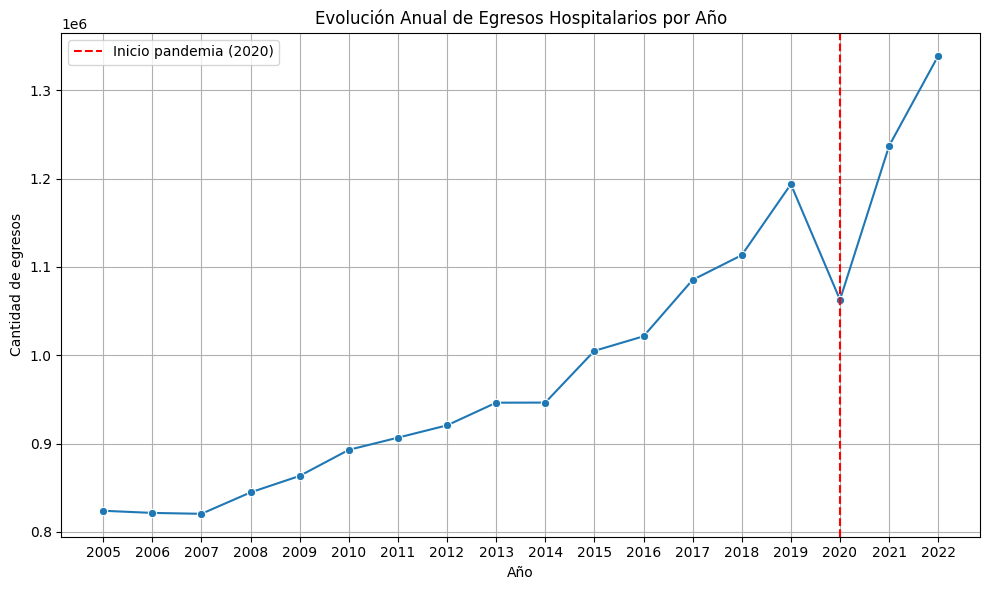

In [28]:
archivo['anio'] = pd.to_numeric(archivo['anio'], errors='coerce')
egresosAño = archivo.groupby('anio')['egresos'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=egresosAño, x='anio', y='egresos', marker='o')
plt.title('Evolución Anual de Egresos Hospitalarios por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de egresos')
plt.grid(True)
plt.xticks(egresosAño['anio'].astype(int))
plt.axvline(x=2020, color='red', linestyle='--', linewidth=1.5, label='Inicio pandemia (2020)')
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
print(egresosAño)

    anio    egresos
0   2005   823976.0
1   2006   821546.0
2   2007   820519.0
3   2008   844758.0
4   2009   863413.0
5   2010   892938.0
6   2011   906727.0
7   2012   920680.0
8   2013   946318.0
9   2014   946458.0
10  2015  1005017.0
11  2016  1021490.0
12  2017  1085387.0
13  2018  1113365.0
14  2019  1193655.0
15  2020  1062817.0
16  2021  1237089.0
17  2022  1339128.0
